In [1]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


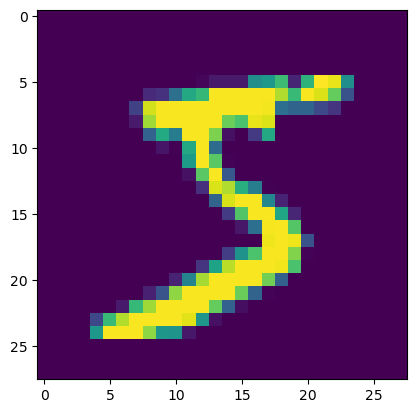

In [3]:
plt.imshow(x_train[0])

In [4]:
x_train = x_train/255
x_test = x_test/255

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
model = Sequential()

model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(64, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer=Adam(0.001), loss = SparseCategoricalCrossentropy(), metrics=["accuracy"])
#model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), validation_split=0.2)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2774 - accuracy: 0.9204 - val_loss: 0.1514 - val_accuracy: 0.9539
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1292 - accuracy: 0.9612 - val_loss: 0.1229 - val_accuracy: 0.9612
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0916 - accuracy: 0.9716 - val_loss: 0.1001 - val_accuracy: 0.9684
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0718 - accuracy: 0.9773 - val_loss: 0.0893 - val_accuracy: 0.9723
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0579 - accuracy: 0.9821 - val_loss: 0.0851 - val_accuracy: 0.9738
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0492 - accuracy: 0.9848 - val_loss: 0.1025 - val_accuracy: 0.9695
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0417 - accuracy: 0.9870 - val_loss: 0.0979 - val_accuracy:

In [11]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0953 - accuracy: 0.9752


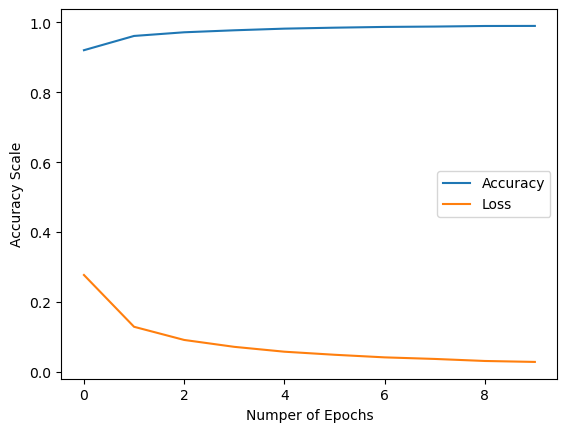

In [12]:
plt.plot(history.history["accuracy"], label = "Accuracy")
plt.plot(history.history["loss"], label = "Loss")
plt.xlabel("Numper of Epochs")
plt.ylabel("Accuracy Scale")
plt.legend()
plt.show()